In [1]:
#Import 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

import warnings
warnings.filterwarnings('ignore') # suppress warnings

from collections import Counter
# import SVM libraries 
from sklearn.svm import SVC
from sklearn.metrics import classification_report, roc_auc_score
from imblearn.over_sampling import SMOTE

In [2]:
#Read dataset and drop unwanted variables
VI= pd.read_csv('VI userIDs 0404.csv')
VI = VI.drop(['Unnamed: 0', 'userIDs', 'group_id','RoleName'], axis = 1)


In [3]:
#define the explanatory and target variable
X = VI[['m_experimental_testing', 'm_making_design_choices', 'm_asking_questions', 'j_customer_consultants_requests', 'j_performance_parameters_requirements', 'j_communication']]
Y = VI['OutcomeScore']

In [4]:
#split into training and testing set
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,train_size=0.7,random_state=0) 

In [5]:
#balance the dataset
X_1 = VI[VI.drop(columns = ['OutcomeScore', 'wordCount']).columns]
from imblearn.over_sampling import SMOTE
# summarize class distribution
print("Before oversampling: ",Counter(Y_train))

# define oversampling strategy
SMOTE = SMOTE(k_neighbors=1, random_state = 0)

X_over, y_over = SMOTE.fit_resample(X_1, Y)
model=SVC()
clf_SMOTE = model.fit(X_over, y_over)
pred_SMOTE = clf_SMOTE.predict(X_test)

accuracy = np.round(accuracy_score(Y_test, pred_SMOTE),3) # calculate the accuracy score
accuracy

Before oversampling:  Counter({4: 95, 2: 43, 3: 39, 5: 38, 6: 25, 1: 18, 0: 11, 7: 3, 8: 2})


0.339

<AxesSubplot:title={'center':'Outcome score count after over sampling'}>

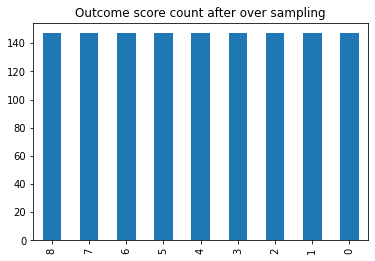

In [6]:
#plot the balanced dataset
outcome_score_count = y_over.value_counts()
outcome_score_count.plot(kind = 'bar', title = 'Outcome score count after over sampling')

In [7]:
#get parameters used in the 'model'
model.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [8]:
#Model after hyperparameter tuning
model=SVC(kernel = 'poly', degree =6 , coef0 = 11, C = 1.0, gamma = 0.2) 
clf_SMOTE = model.fit(X_over, y_over) #balanced
pred_SMOTE = clf_SMOTE.predict(X_test) #unbalanced

accuracy = np.round(accuracy_score(Y_test, pred_SMOTE),3) # calculate the accuracy score
print(accuracy)


0.949


In [9]:
#cross validation score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
scores = cross_val_score(model, X_over, y_over, cv=cv) #unbalanced
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.74 accuracy with a standard deviation of 0.02


## Feature Selection

In [13]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=6)
fit = bestfeatures.fit(X[0:100],Y[0:100])
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

                                   Specs      Score
5                        j_communication  77.998685
2                     m_asking_questions  31.401402
0                 m_experimental_testing  24.119171
1                m_making_design_choices  18.260145
4  j_performance_parameters_requirements   8.807408
3        j_customer_consultants_requests   7.564784


In [15]:
#drop the worst feature and run the model.
model=SVC(kernel = 'poly', degree =6 , coef0 = 11, C = 1.0, gamma = 0.2) 
clf_SMOTE = model.fit(X_over.drop('j_customer_consultants_requests' , axis = 1), y_over) #balanced
pred_SMOTE = clf_SMOTE.predict(X_test.drop('j_customer_consultants_requests' , axis = 1)) #unbalanced

accuracy = np.round(accuracy_score(Y_test, pred_SMOTE),3) # calculate the accuracy score
print(accuracy)


0.907
